In [1]:
import json
import pandas as pd
import importlib
import matplotlib.pyplot as plt
import utils.minimum_union as mu
importlib.reload(mu)

<module 'utils.minimum_union' from '/Users/jan/Git/wu-bachelor-thesis/log-statistics/notebooks/utils/minimum_union.py'>

# Query Coverage

## DBpedia

### Coverage for each period separately

In [2]:
parts = [2013, 2014, 2015, 2016]
usewod_dfs = [mu.import_statistics(f"../../results/queryshapes/usewod_{part}", to_set=True) for part in parts]
usewod_alt_dfs = [(df[:10000], meta) for df, meta in usewod_dfs]
max_cov = [df["weight"].sum() / meta["VALID_QUERIES"] for df, meta in usewod_dfs]
alt_error = [df[10000:]["weight"].sum() / meta["VALID_QUERIES"] for df, meta in usewod_dfs]
max_cov = [df["weight"].sum() / meta["VALID_QUERIES"] for df, meta in usewod_dfs]
print(max_cov)
print(alt_error)

[0.6275395599471748, 0.9274821446890399, 0.8761425536809428, 0.7054165741974265]
[0.0003860796983636394, 0.0, 6.402106621597119e-05, 0.0016254130432050318]


In [3]:
import json

usewod_dfs_minimum_unions = []

for i in range(2013,2017):
    with open(f"../../results/minimum-unions/usewod_{i}_minimum_unions.json", "r") as file:
        usewod_dfs_minimum_unions.append(json.load(file))

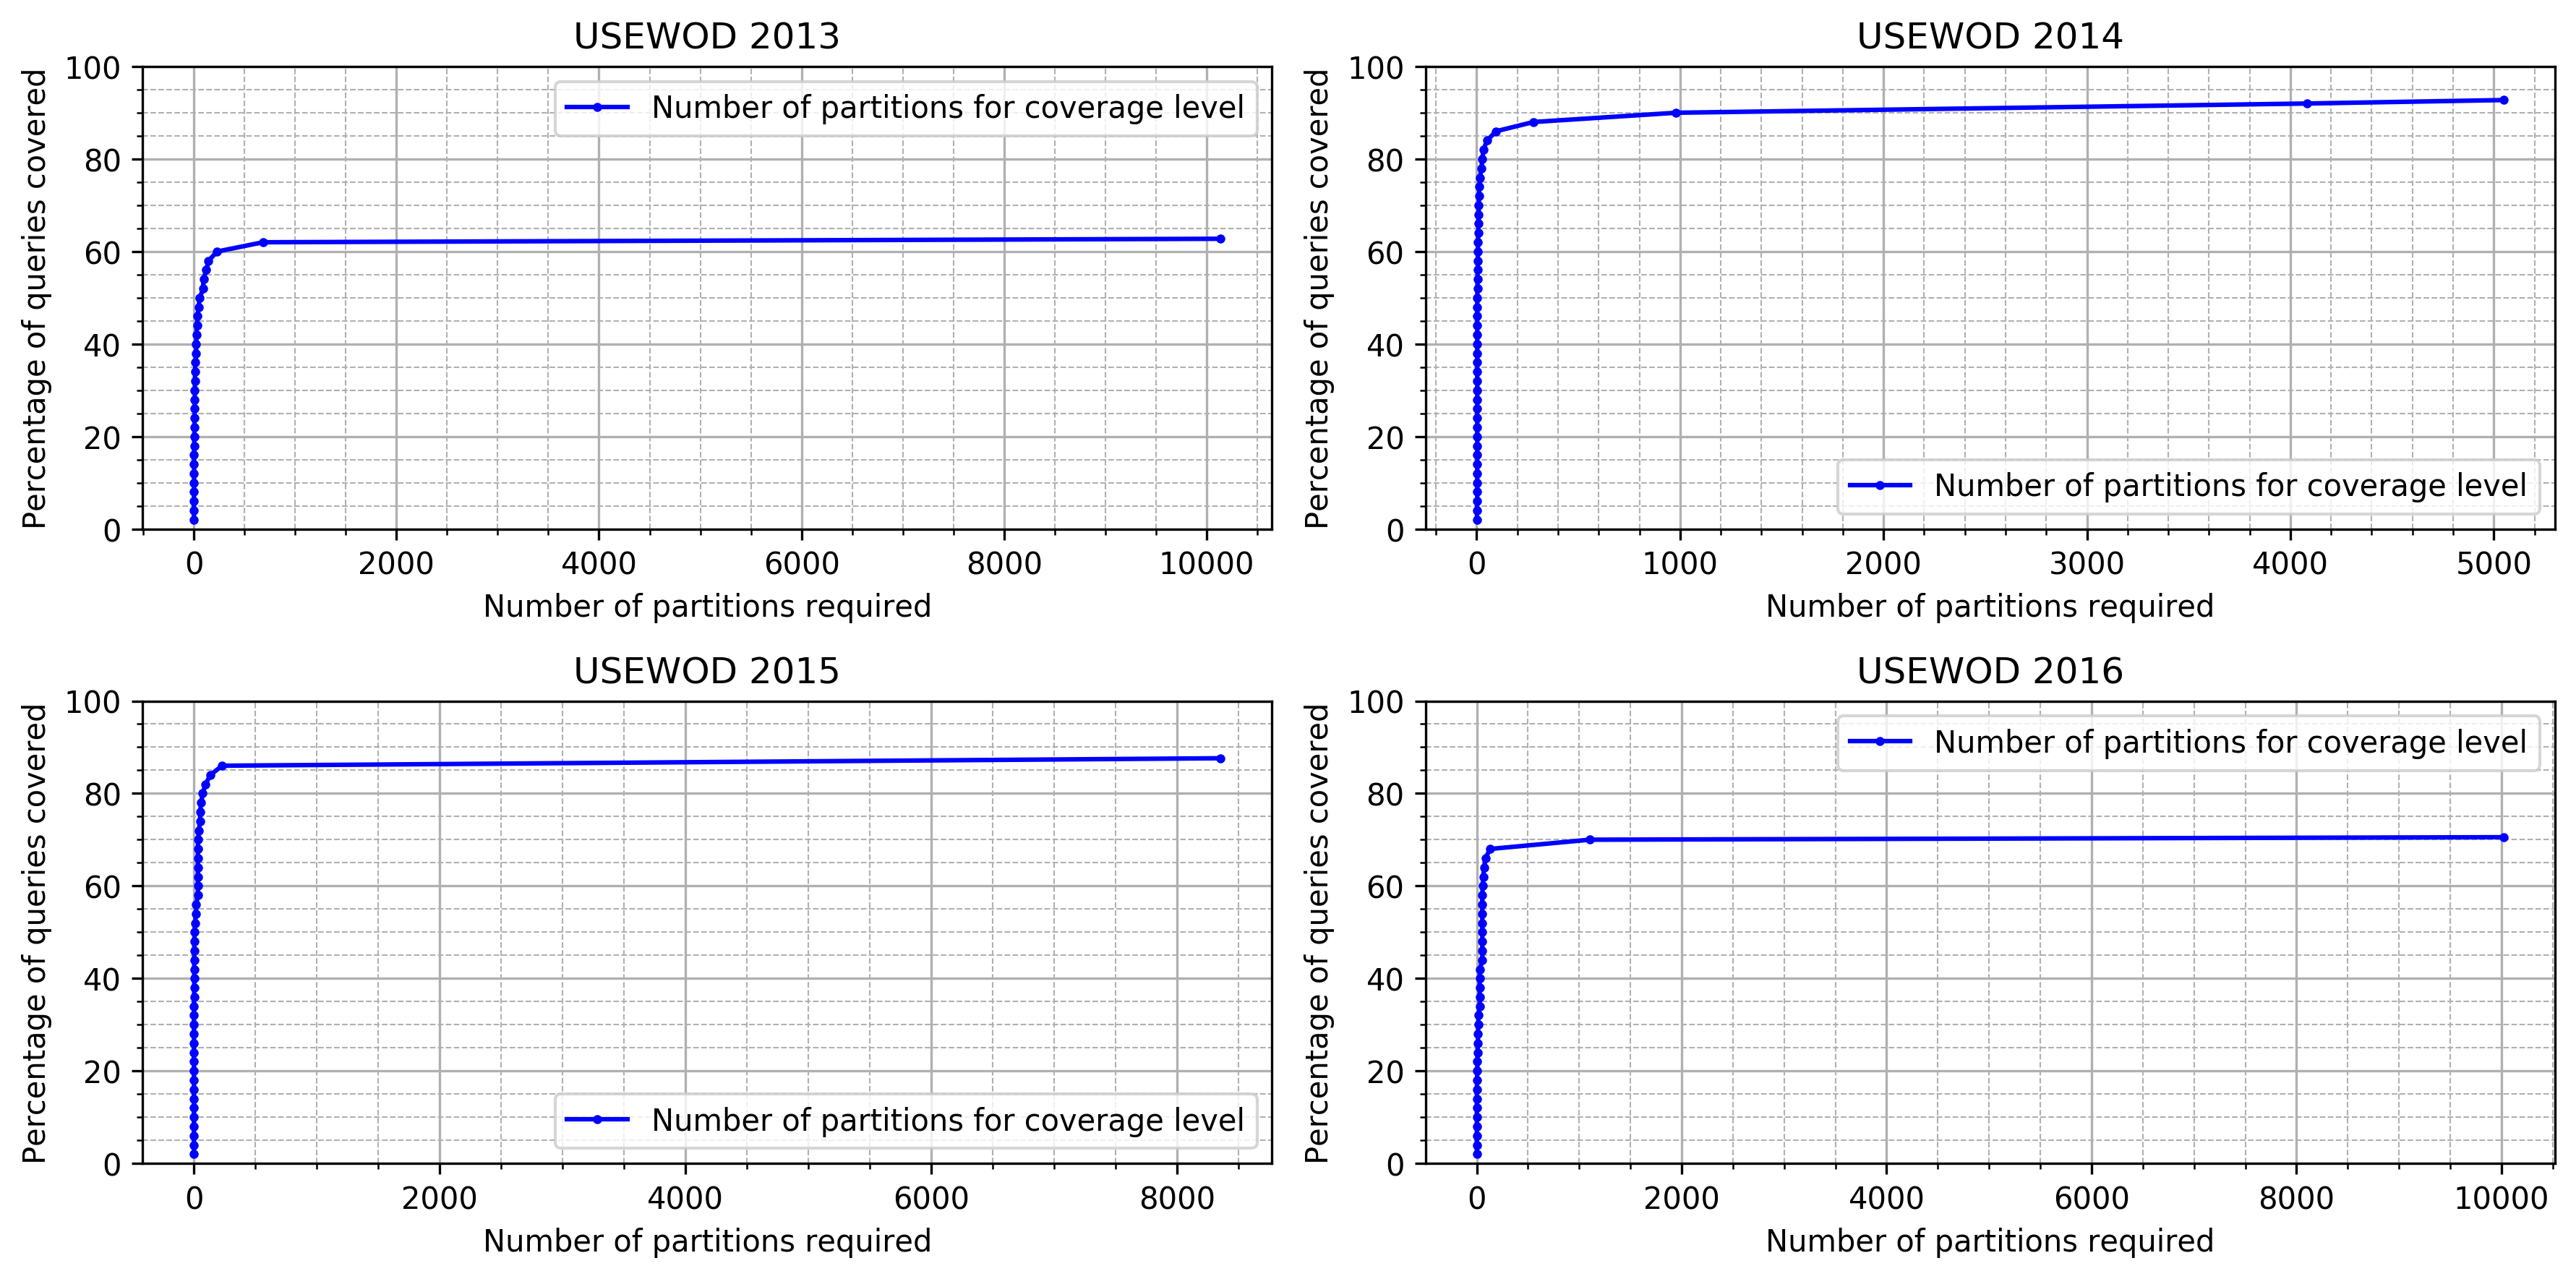

In [4]:
fig, axes = plt.subplots(2,2, figsize=(12,6),dpi=300)
axli = axes.flatten()

for (i, (year, min_unions, axes)) in enumerate(zip(parts, usewod_dfs_minimum_unions, axli)):
    mu.plot_minimum_unions(min_unions, axes, f"USEWOD {year}", positions=([i for i in range(2, len(min_unions)*2, 2)] + [max_cov[i] * 100]))
    
fig.tight_layout()

### Coverage for all periods together

In [5]:
parts = [2013, 2014, 2015, 2016]
usewod_df, usewod_meta = mu.import_combined([f"../../results/queryshapes/usewod_{part}" for part in parts])
usewod_alt_df = usewod_df[:10000]

max_cov = usewod_df["weight"].sum() / usewod_meta["VALID_QUERIES"]
usewod_alt_error = usewod_df[10000:]["weight"].sum() / usewod_meta["VALID_QUERIES"]

print(max_cov)
print(usewod_alt_error)

0.7276752840705705
0.0021173378054110707


In [6]:
import json
with open("../../results/minimum-unions/usewod_minimum_unions.json", "r") as file:
    usewod_min_unions_json = json.load(file)

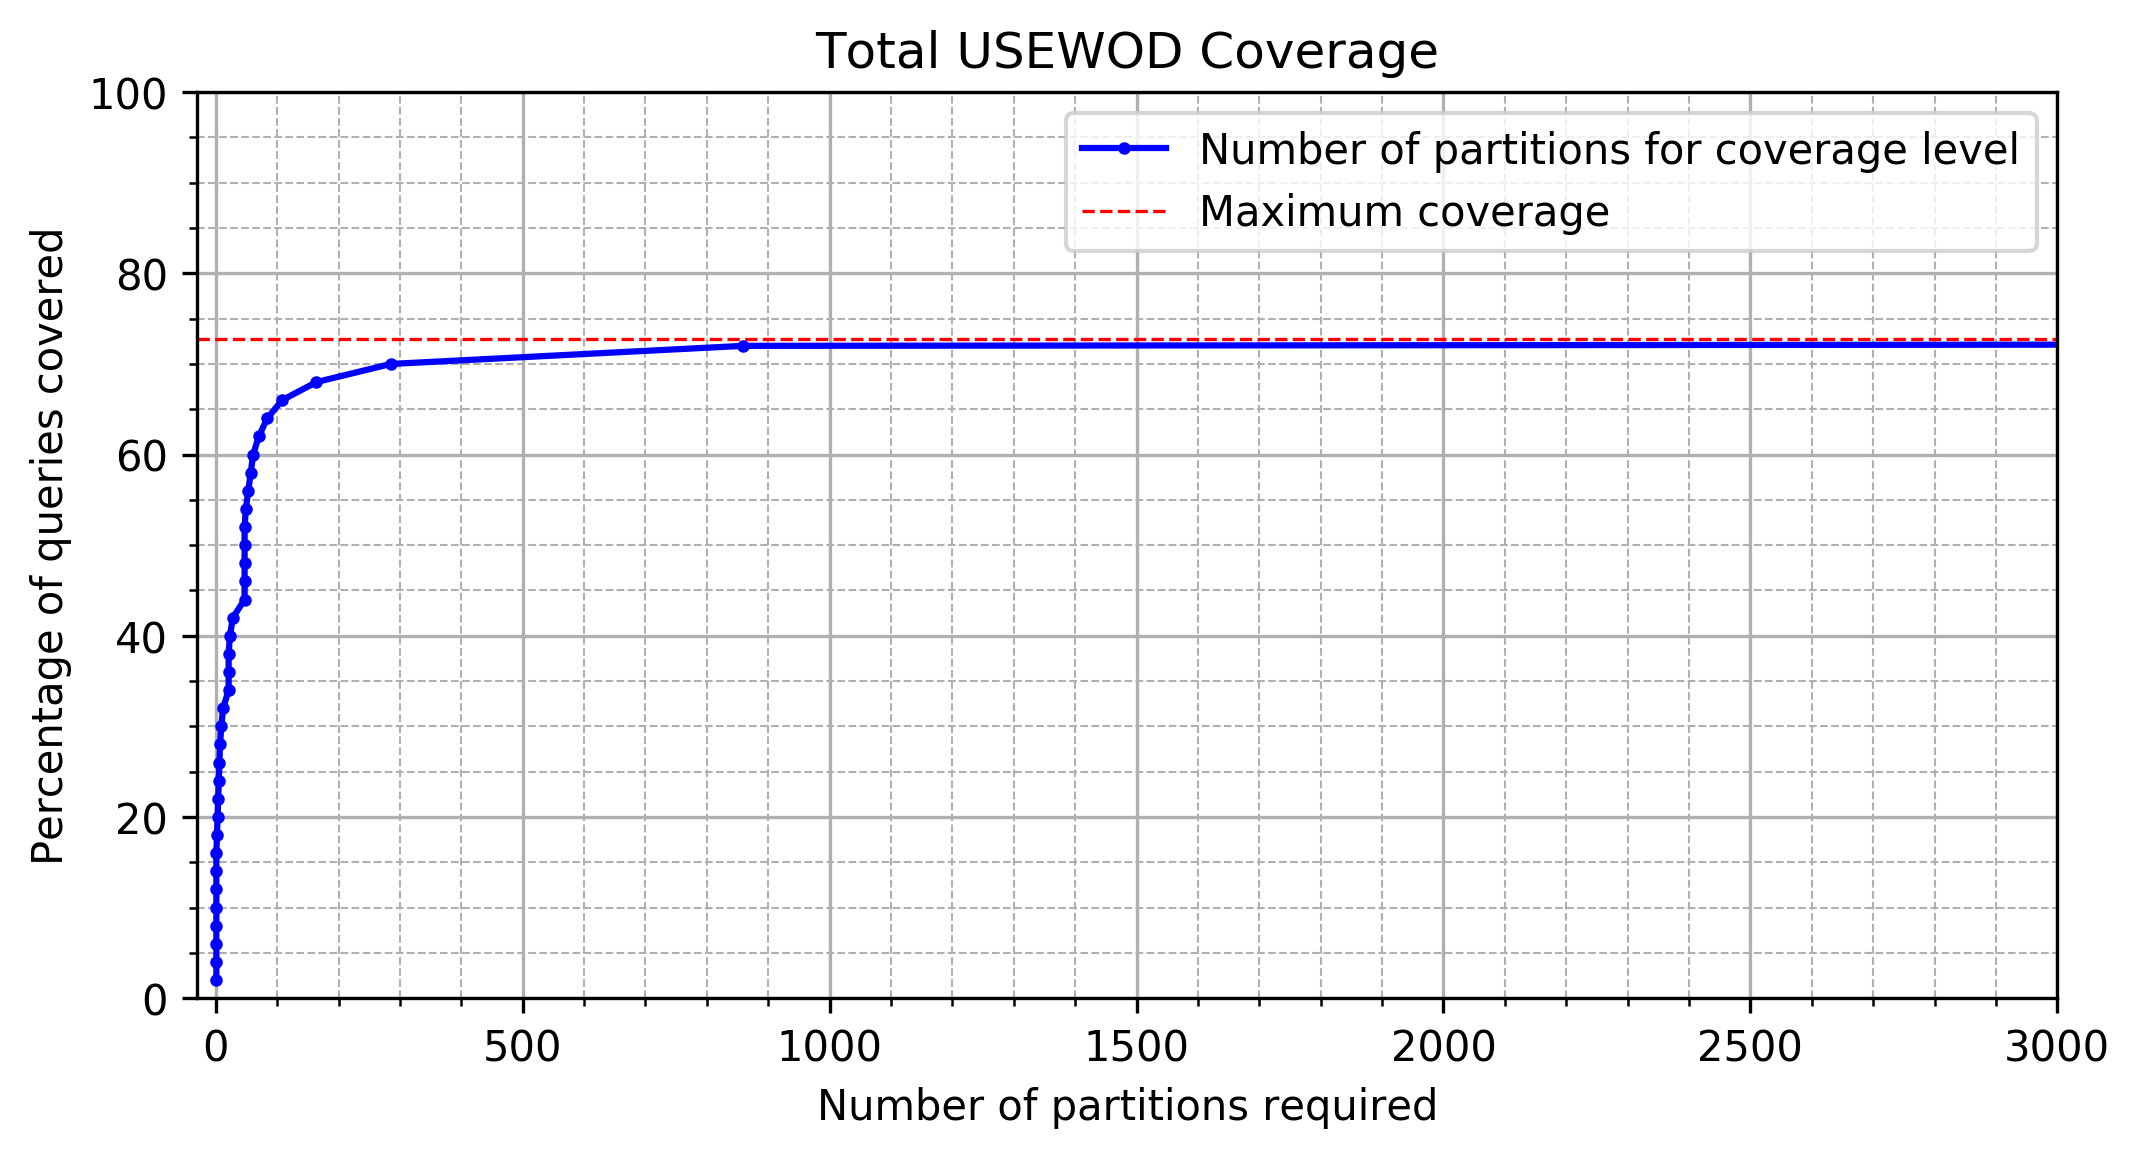

In [7]:
fig, axes = plt.subplots(1, 1, figsize=(8,4), dpi=300)
mu.plot_minimum_unions(usewod_min_unions_json, axes, f"Total USEWOD Coverage", (-30,3000), positions=([i for i in range(2, 74, 2)] + [72.558749]), max_cov=max_cov*100)

### Resolving the partitions list for 70 percent total coverage

In [8]:
usewod_minimum_unions_70 = usewod_min_unions_json[-3]
len(usewod_minimum_unions_70["optimalPartitions"])

285

In [9]:
resolved_partitions = []
predicate_map = { int(index): predicate for predicate, index in (line.split("\t") for line in open(f"../../results/queryshapes/usewod_predicate_map.tsv").readlines())}
for partition in usewod_minimum_unions_70["optimalPartitions"]:
    indices = partition.split(',')
    predicates = ",".join([predicate_map[int(index)] for index in indices])
    resolved_partitions.append(predicates)

In [10]:
with open("../../results/queryshapes/usewod_2016_partitions_68.txt", "w") as file:
    # file.write("Total coverage: " + str(usewod_minimum_unions_70["weightSum"] / usewod_dfs[3][1]["VALID_QUERIES"]) + "\n")
    for part in resolved_partitions:
        file.write(part + "\n")

In [11]:
sorted_partitions = sorted(resolved_partitions, key=lambda p: len(p.split(",")))
file = open("../../results/queryshapes/usewod_partitions_70_by_partition_size.txt", "w")
file.write("Total coverage: " + str(usewod_minimum_unions_70["weightSum"] / usewod_meta["VALID_QUERIES"]) + "\n")
for part in sorted_partitions:
    file.write(part + "\n")

In [12]:
sizes = {}
for part in resolved_partitions:
    split = part.split(",")
    sizes[len(split)] = sizes.get(len(split), 0) + 1
sizes

{1: 133, 2: 55, 3: 30, 4: 50, 5: 11, 6: 6}

## Wikidata - All queries (application-generated and human)

In [13]:
import pandas as pd
import json

parts = [1,2,3,4,5,6,7]

all_df, all_meta = mu.import_combined([f"../../results/queryshapes/wikidata_all_{part}" for part in parts])
alt_df = all_df[:10000]

max_cov = all_df["weight"].sum() / all_meta["VALID_QUERIES"]
alt_error = all_df[10000:]["weight"].sum() / all_meta["VALID_QUERIES"]

print(max_cov)
print(alt_error)

0.7287950354307022
0.001870723636839543


In [14]:
418450525 / all_meta["VALID_QUERIES"]

0.7269453531394727

In [15]:
import json
with open("../../results/minimum-unions/wikidata_all_minimum_unions.json", "r") as file:
    all_min_unions_json = json.load(file)

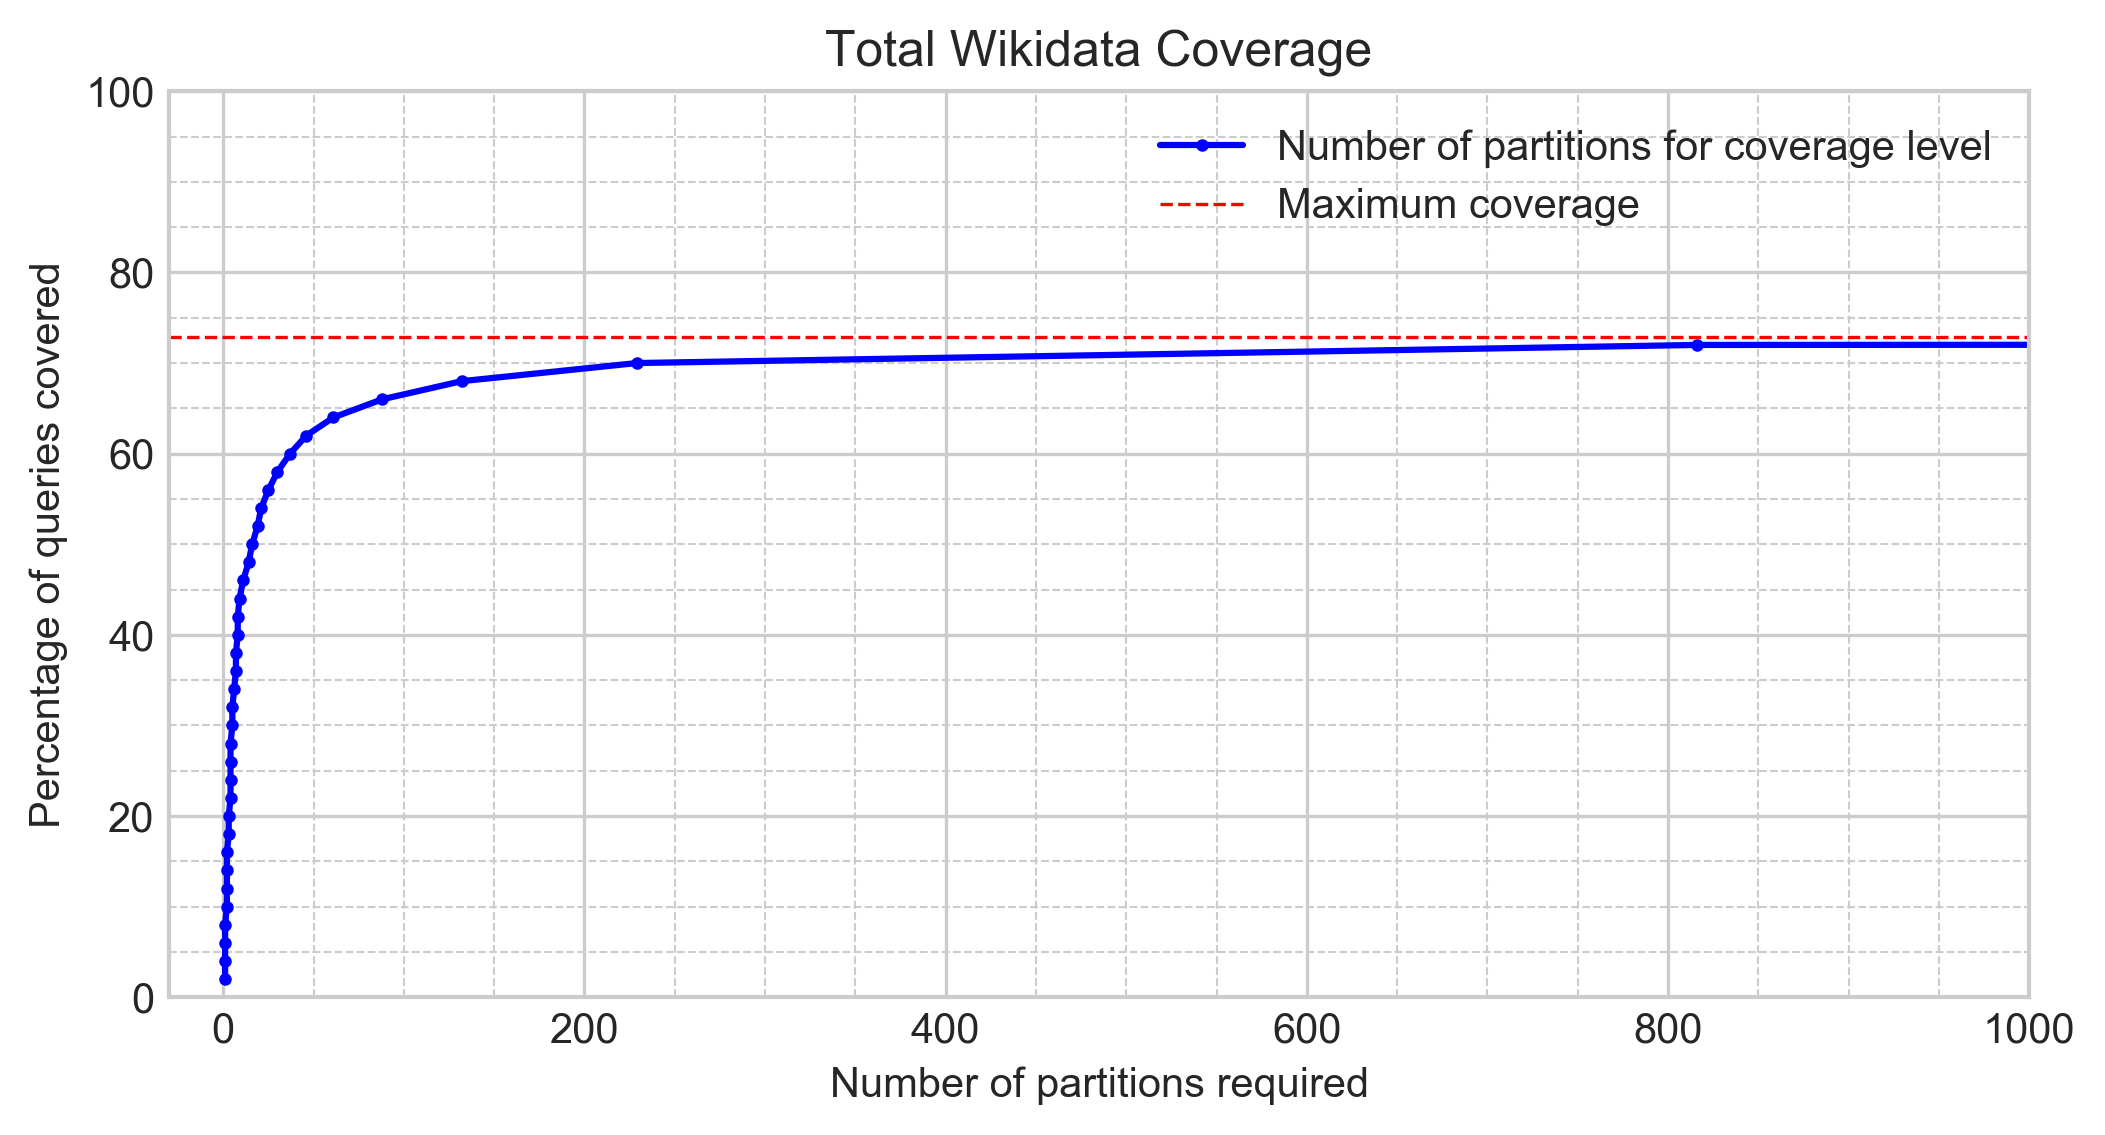

In [16]:
plt.style.use("seaborn-whitegrid")
fig, axes = plt.subplots(figsize=(8,4),dpi=300)
mu.plot_minimum_unions(all_min_unions_json, axes, 'Total Wikidata Coverage', (-30, 1000), positions=([i for i in range(2, 74, 2)] + [72.69453531394727]), max_cov=max_cov*100)

In [17]:
import json
with open("../../results/minimum-unions/wikidata_all_minimum_unions.json", "r") as file:
    wikidata_all_min_unions = json.load(file)
wikidata_all_min_unions_70 = wikidata_all_min_unions[-3]

In [18]:
resolved_partitions = []
predicate_map = { int(index): predicate for predicate, index in (line.split("\t") for line in open(f"../../results/queryshapes/wikidata_predicate_map.tsv").readlines())}
for partition in wikidata_all_min_unions_70["optimalPartitions"]:
    indices = partition.split(',')
    predicates = ",".join([predicate_map[int(index)] for index in indices])
    resolved_partitions.append(predicates)

In [19]:
file = open("../../results/queryshapes/wikidata_all_partitions_70.txt", "w")
for part in resolved_partitions:
    file.write(part + "\n")

## Wikidata - Organic queries only

In [20]:
parts = [1,2,3,4,5,6,7]
organic_df, organic_meta = mu.import_combined([f"../../results/queryshapes/wikidata_organic_{part}" for part in parts])
organic_alt_df = organic_df[:40000]
max_cov = organic_df["weight"].sum() / organic_meta["VALID_QUERIES"]
alt_error = organic_df[25000:]["weight"].sum() / organic_meta["VALID_QUERIES"]

print(max_cov)
print(alt_error)

0.6651256827578499
0.023207708074883038


In [21]:
print(2256097 / organic_meta["VALID_QUERIES"])
print(organic_df[:25000]["weight"].sum() / organic_meta["VALID_QUERIES"])

0.6432606094233058
0.6419179746829669


In [22]:
import json
with open("../../results/minimum-unions/wikidata_organic_minimum_unions.json", "r") as file:
    organic_min_unions_json = json.load(file)

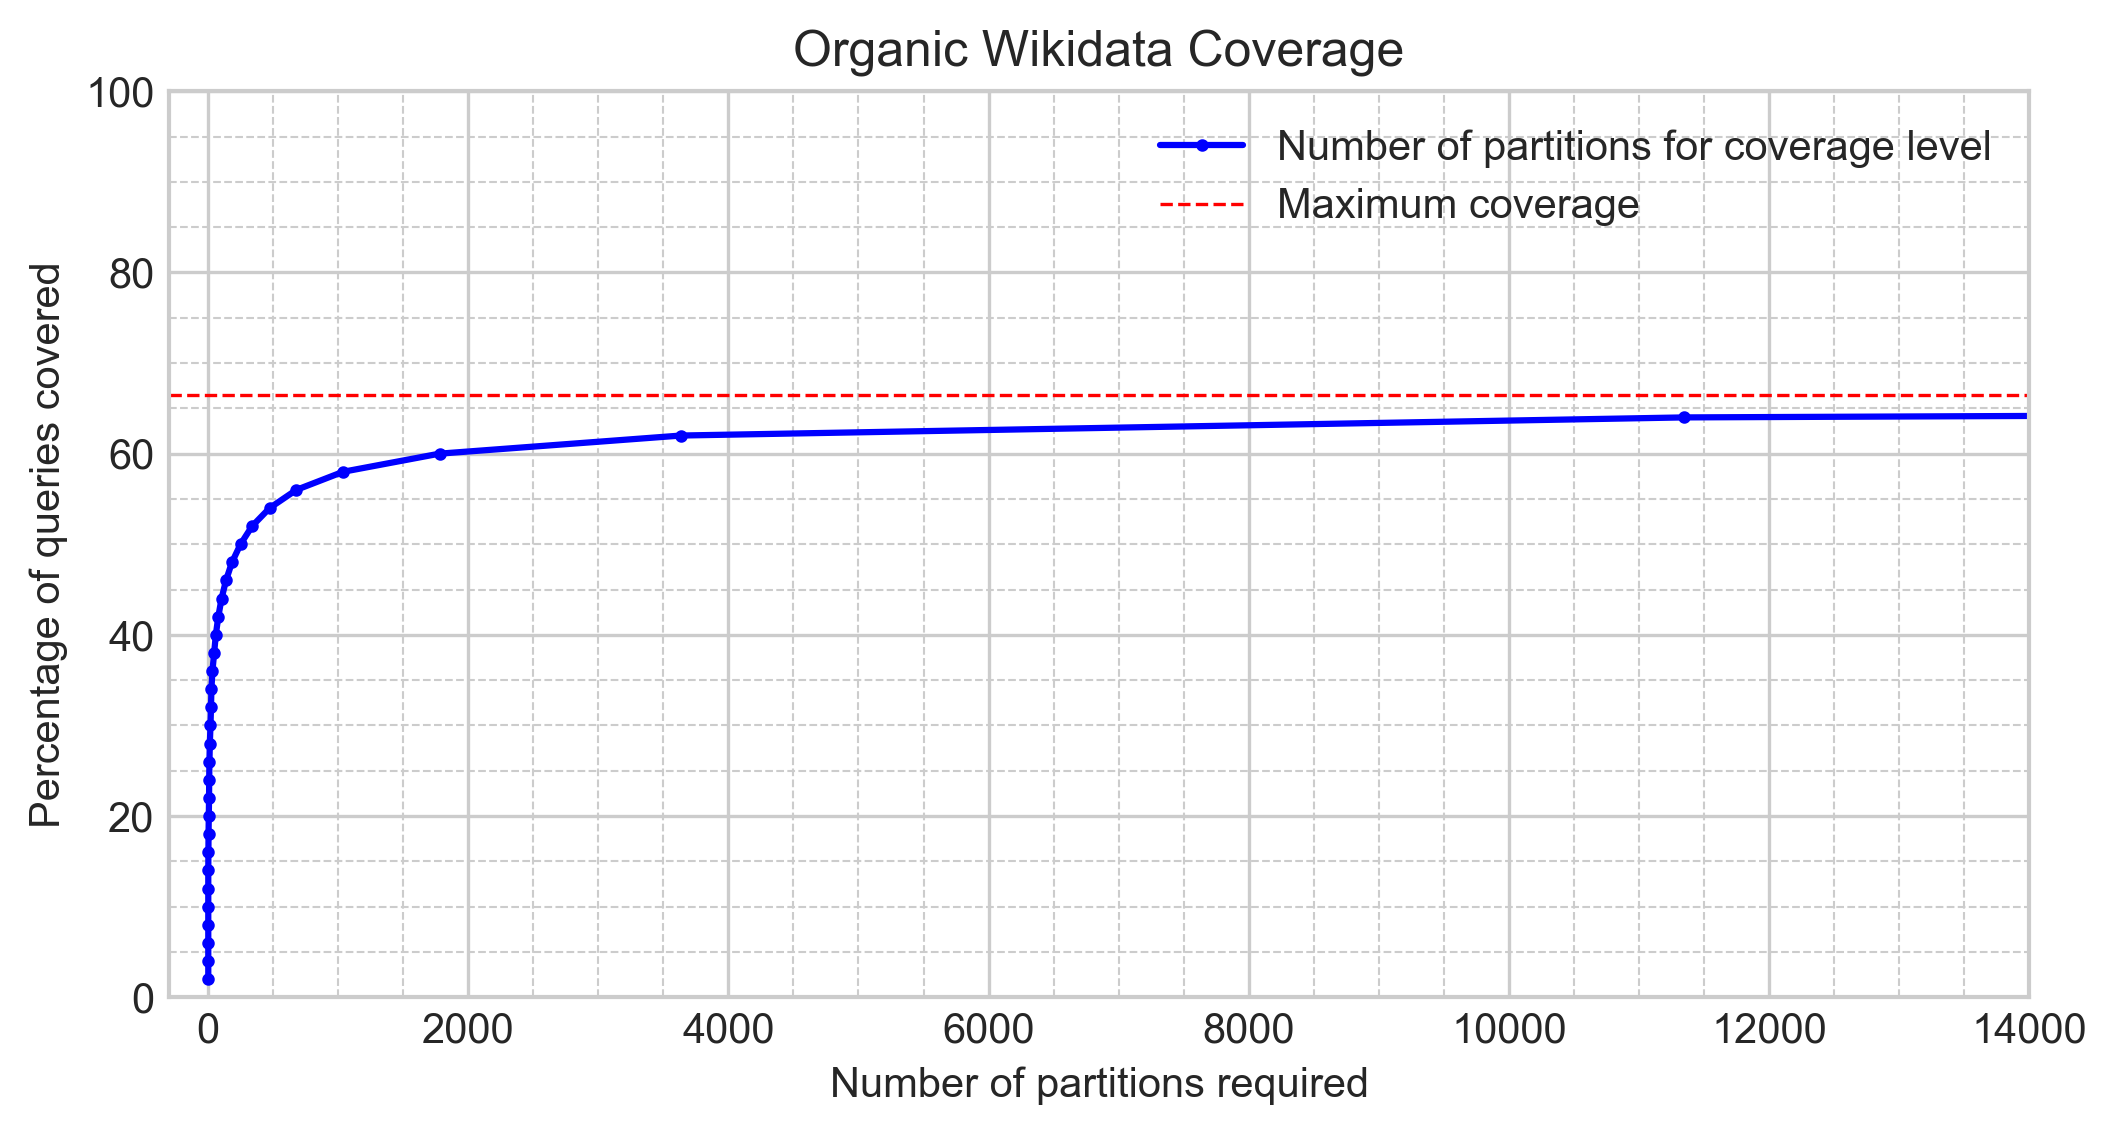

In [23]:
plt.style.use("seaborn-whitegrid")
fig, axes = plt.subplots(figsize=(8,4),dpi=300)
mu.plot_minimum_unions(organic_min_unions_json, axes, 'Organic Wikidata Coverage', (-300, 14000), positions=([i for i in range(2, 66, 2)] + [64.32606094233058]), max_cov=max_cov*100)

# Coverage progression

## Wikidata All

In [24]:
parts = [1,2,3,4,5,6,7]
all_dfs = [mu.import_statistics(f"../../results/queryshapes/wikidata_all_{part}", to_set=True) for part in parts]
all_alt_dfs = [(df[:10000], meta) for df, meta in all_dfs]
max_cov = [df["weight"].sum() / meta["VALID_QUERIES"] for df, meta in all_dfs]
alt_error = [df[10000:]["weight"].sum() / meta["VALID_QUERIES"] for df, meta in all_dfs]
print(max_cov)
print(alt_error)

[0.8318499515079743, 0.8867341725988775, 0.862508527234499, 0.67297751951376, 0.6373632802726334, 0.7005387666505976, 0.6037357079555528]
[0.0037111629817312523, 0.0007124311821698181, 0.0004825254421077645, 0.000914314935167695, 0.0013605881146155734, 0.0012338392233956375, 0.0016690661710733877]


In [25]:
import json

all_dfs_min_unions = []

for i in range(1, 8):
    with open(f"../../results/minimum-unions/wikidata_all_{i}_minimum_unions.json", "r") as file:
        all_dfs_min_unions.append(json.load(file))

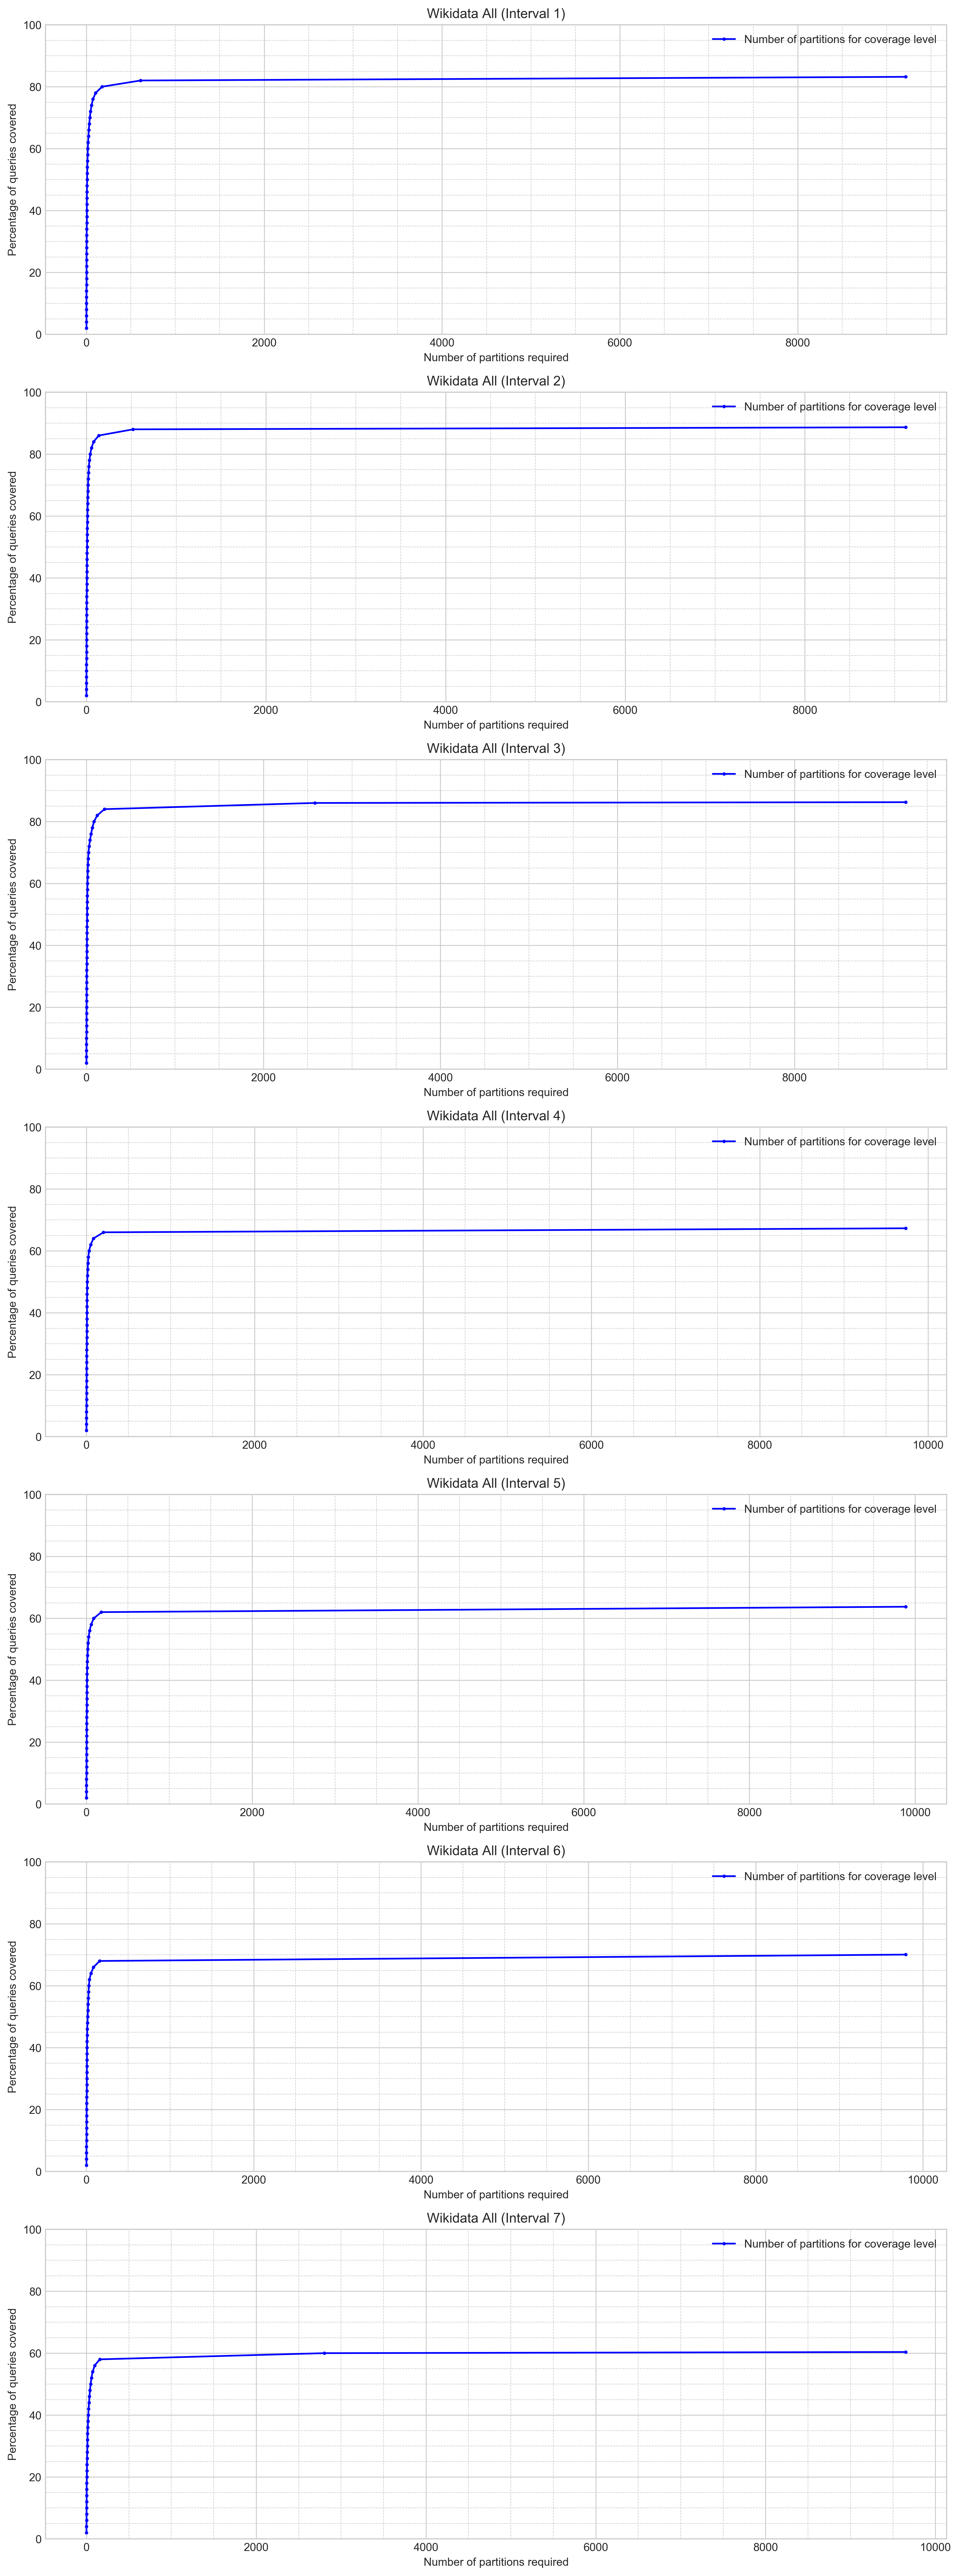

In [26]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(7,1, figsize=(12,32),dpi=300)

for i, min_unions in enumerate(all_dfs_min_unions):
    mu.plot_minimum_unions(min_unions, axes[i], f"Wikidata All (Interval {i+1})", positions=([i for i in range(2, len(min_unions)*2, 2)] + [max_cov[i] * 100]))
    
fig.tight_layout()

In [27]:
under_threshold = []
for min_unions in all_dfs_min_unions:
    under_candidate = min_unions[0]
    for i in range(1, len(min_unions)):
        if (len(min_unions[i]["optimalPartitions"]) - len(min_unions[i-1]["optimalPartitions"])) < 200:
            candidate = min_unions[i]
            
    under_threshold.append(candidate)

#under_threshold = [[u for u in min_unions if len(u["optimalPartitions"]) < 500][-1] for min_unions in all_dfs_min_unions]
[len(u["optimalPartitions"]) for u in under_threshold]

[177, 137, 204, 203, 180, 159, 157]

[96.1726049394502, 96.99539137062965, 97.39749951538373, 98.0765968887626, 97.28499755566156, 97.07771501714703, 96.08360883925421]
[None, 90.0270091387281, 89.33371683330076, 95.24044983331255, 96.20161686086787, 92.69006484297493, 92.33473796077952]


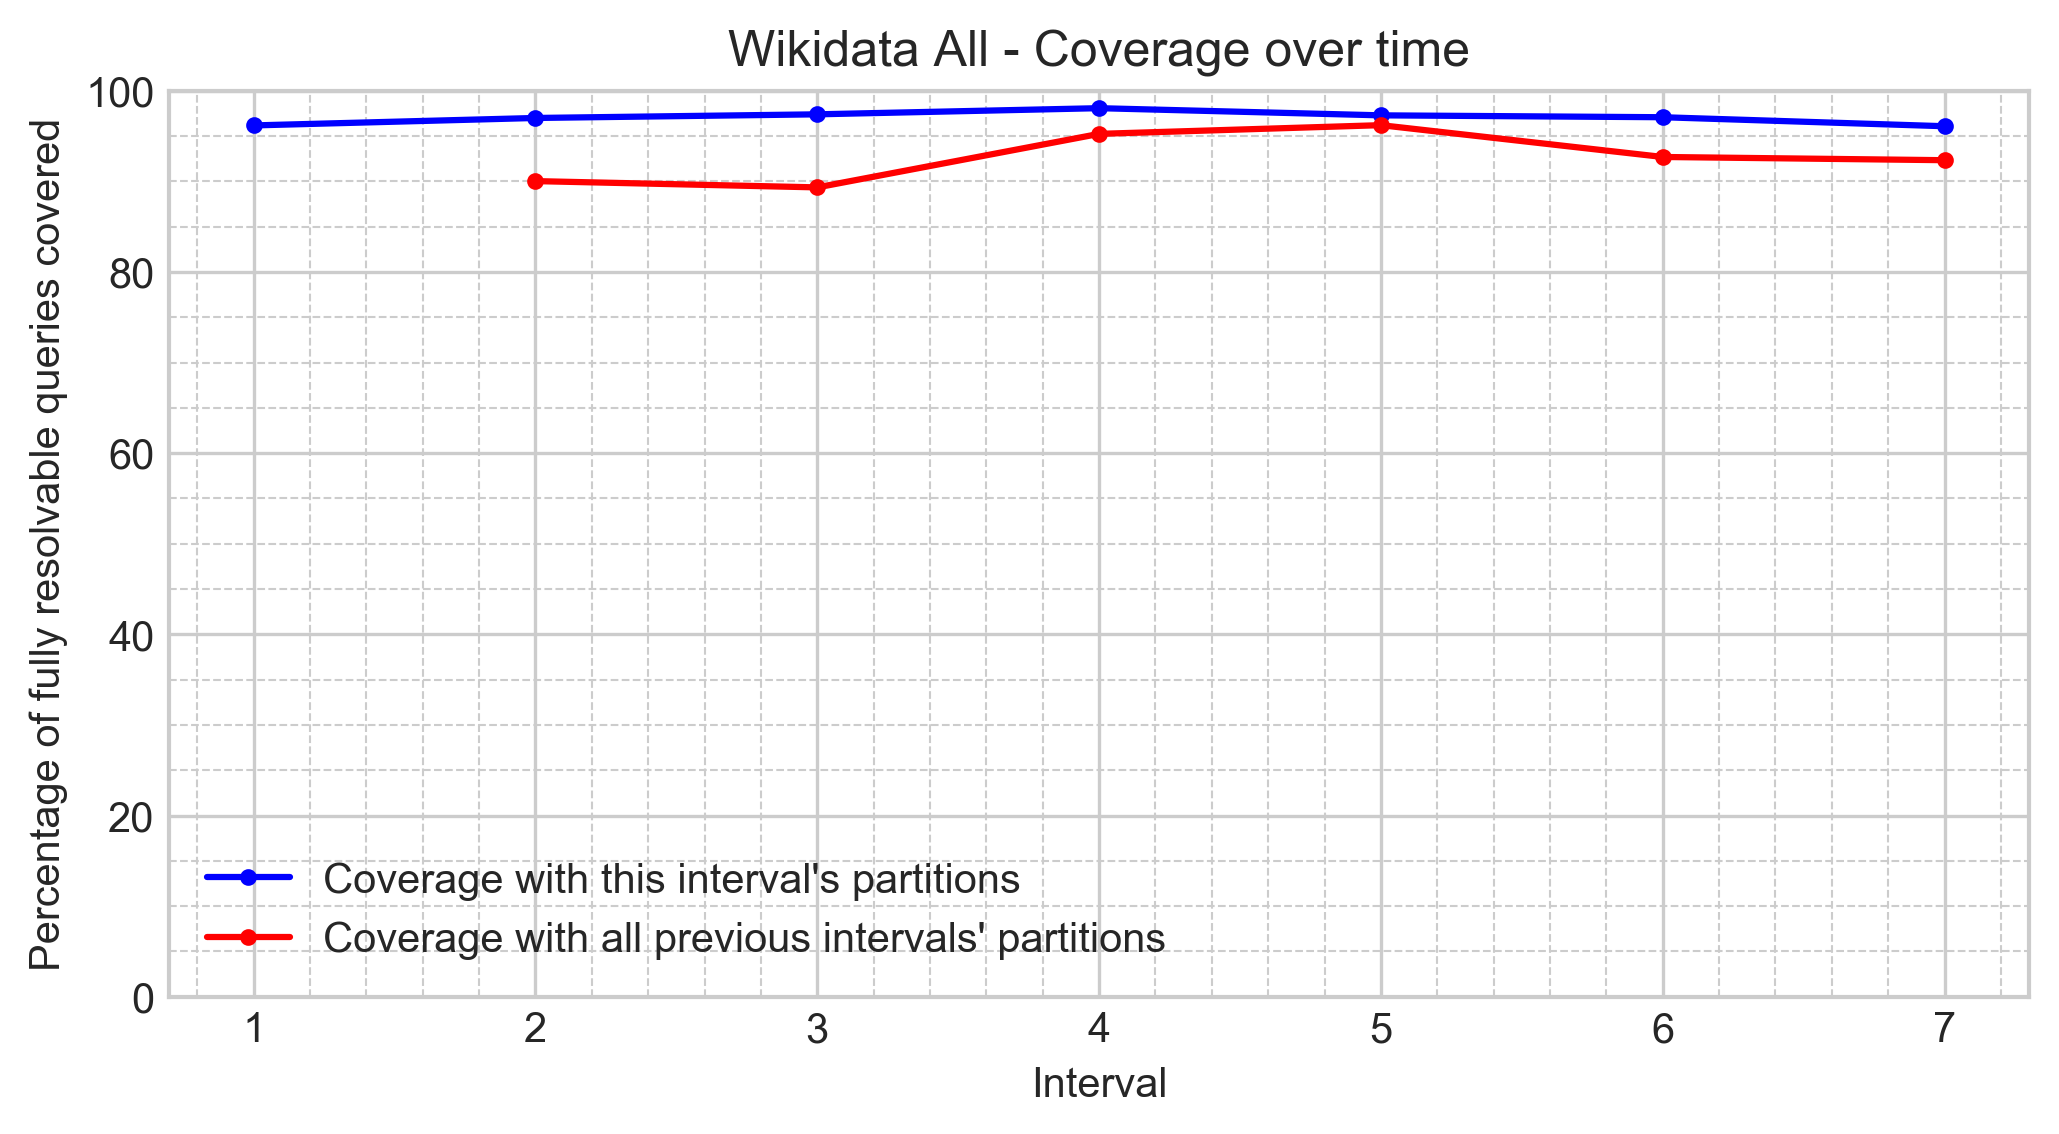

In [28]:
all_cov_now, all_cov_prev = mu.calc_coverage_progression(all_dfs, under_threshold)
print(all_cov_now)
print(all_cov_prev)

plt.style.use("seaborn-whitegrid")
fig, axes = plt.subplots(figsize=(8,4), dpi=300)
mu.plot_coverage_progression(all_cov_now, all_cov_prev, axes, "Wikidata All - Coverage over time")

## Wikidata Organic

In [29]:
parts = [1,2,3,4,5,6,7]
organic_dfs = [mu.import_statistics(f"../../results/queryshapes/wikidata_organic_{part}", to_set=True) for part in parts]

max_cov = [df["weight"].sum() / meta["VALID_QUERIES"] for df, meta in organic_dfs]
alt_error = [df[40000:]["weight"].sum() / meta["VALID_QUERIES"] for df, meta in organic_dfs]
print(max_cov)
print(alt_error)

[0.8614116298081517, 0.8410322502080331, 0.8201103608181456, 0.47023425098233307, 0.5974780888893351, 0.6783963546174995, 0.6796618238604609]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [30]:
import json

org_dfs_min_unions = []

for i in range(1, 8):
    with open(f"../../results/minimum-unions/wikidata_organic_{i}_minimum_unions.json", "r") as file:
        org_dfs_min_unions.append(json.load(file))

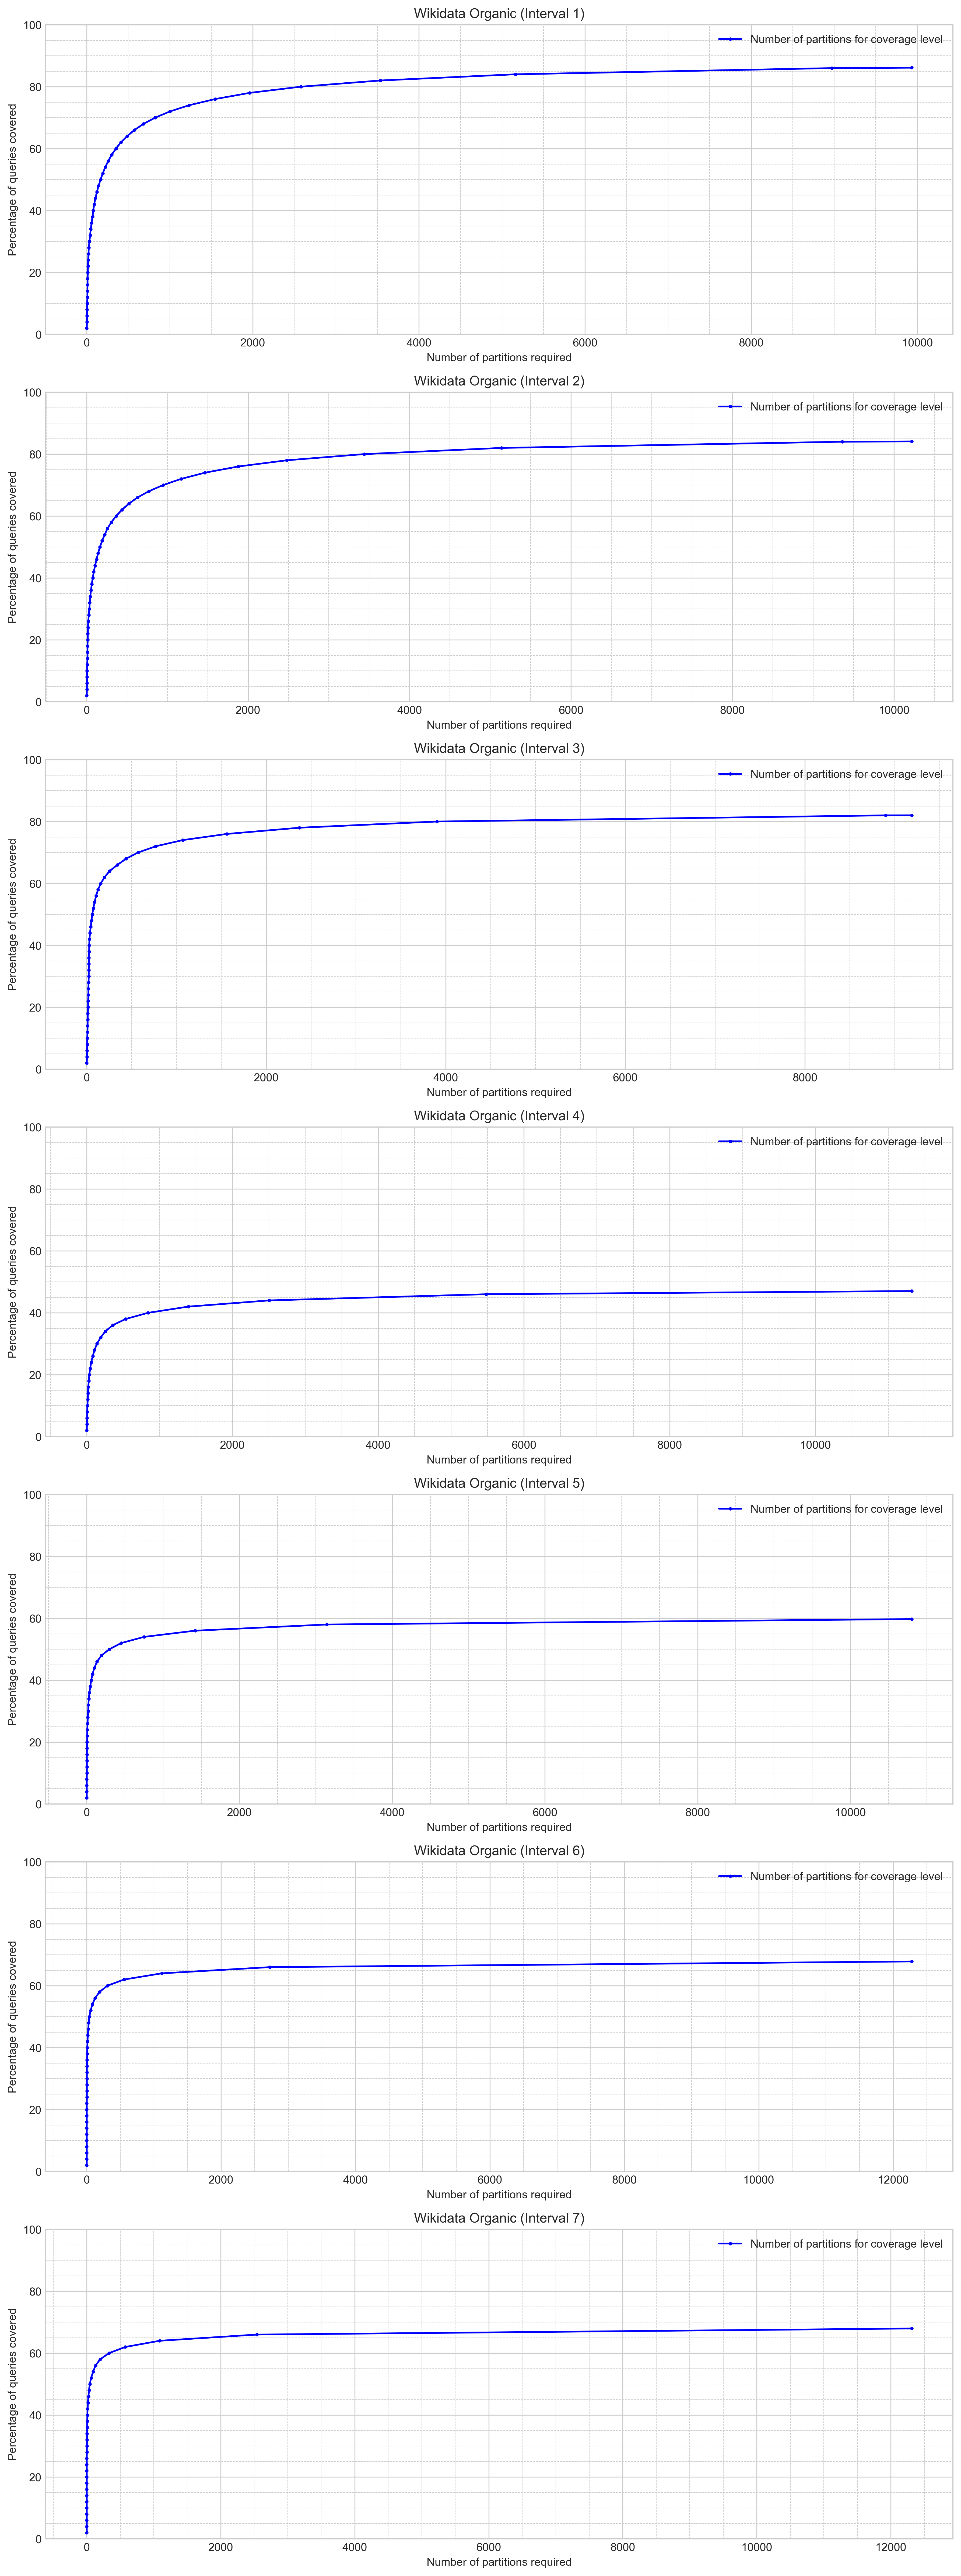

In [31]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(7,1, figsize=(12,32),dpi=300)

for i, min_unions in enumerate(org_dfs_min_unions):
    mu.plot_minimum_unions(min_unions, axes[i], f"Wikidata Organic (Interval {i+1})", positions=([i for i in range(2, len(min_unions)*2, 2)] + [max_cov[i] * 100]))
    
fig.tight_layout()

In [32]:
under_threshold = []
for min_unions in org_dfs_min_unions:
    under_candidate = min_unions[0]
    for i in range(1, len(min_unions)):
        if (len(min_unions[i]["optimalPartitions"]) - len(min_unions[i-1]["optimalPartitions"])) < 2000:
            candidate = min_unions[i]
        else:
            break
            
    under_threshold.append(candidate)

#under_threshold = [[u for u in min_unions if len(u["optimalPartitions"]) < 500][-1] for min_unions in all_dfs_min_unions]
[len(u["optimalPartitions"]) for u in under_threshold]

[5161, 5140, 3901, 2504, 3145, 2724, 2538]

[97.51465141645765, 97.49930620075533, 97.54867313499967, 93.57139495381244, 97.07542889788786, 97.28893957424303, 97.10746178756696]
[None, 79.29401402077778, 77.49607585757428, 79.50419517287706, 87.85811503369013, 92.68064921327516, 92.22943364047659]


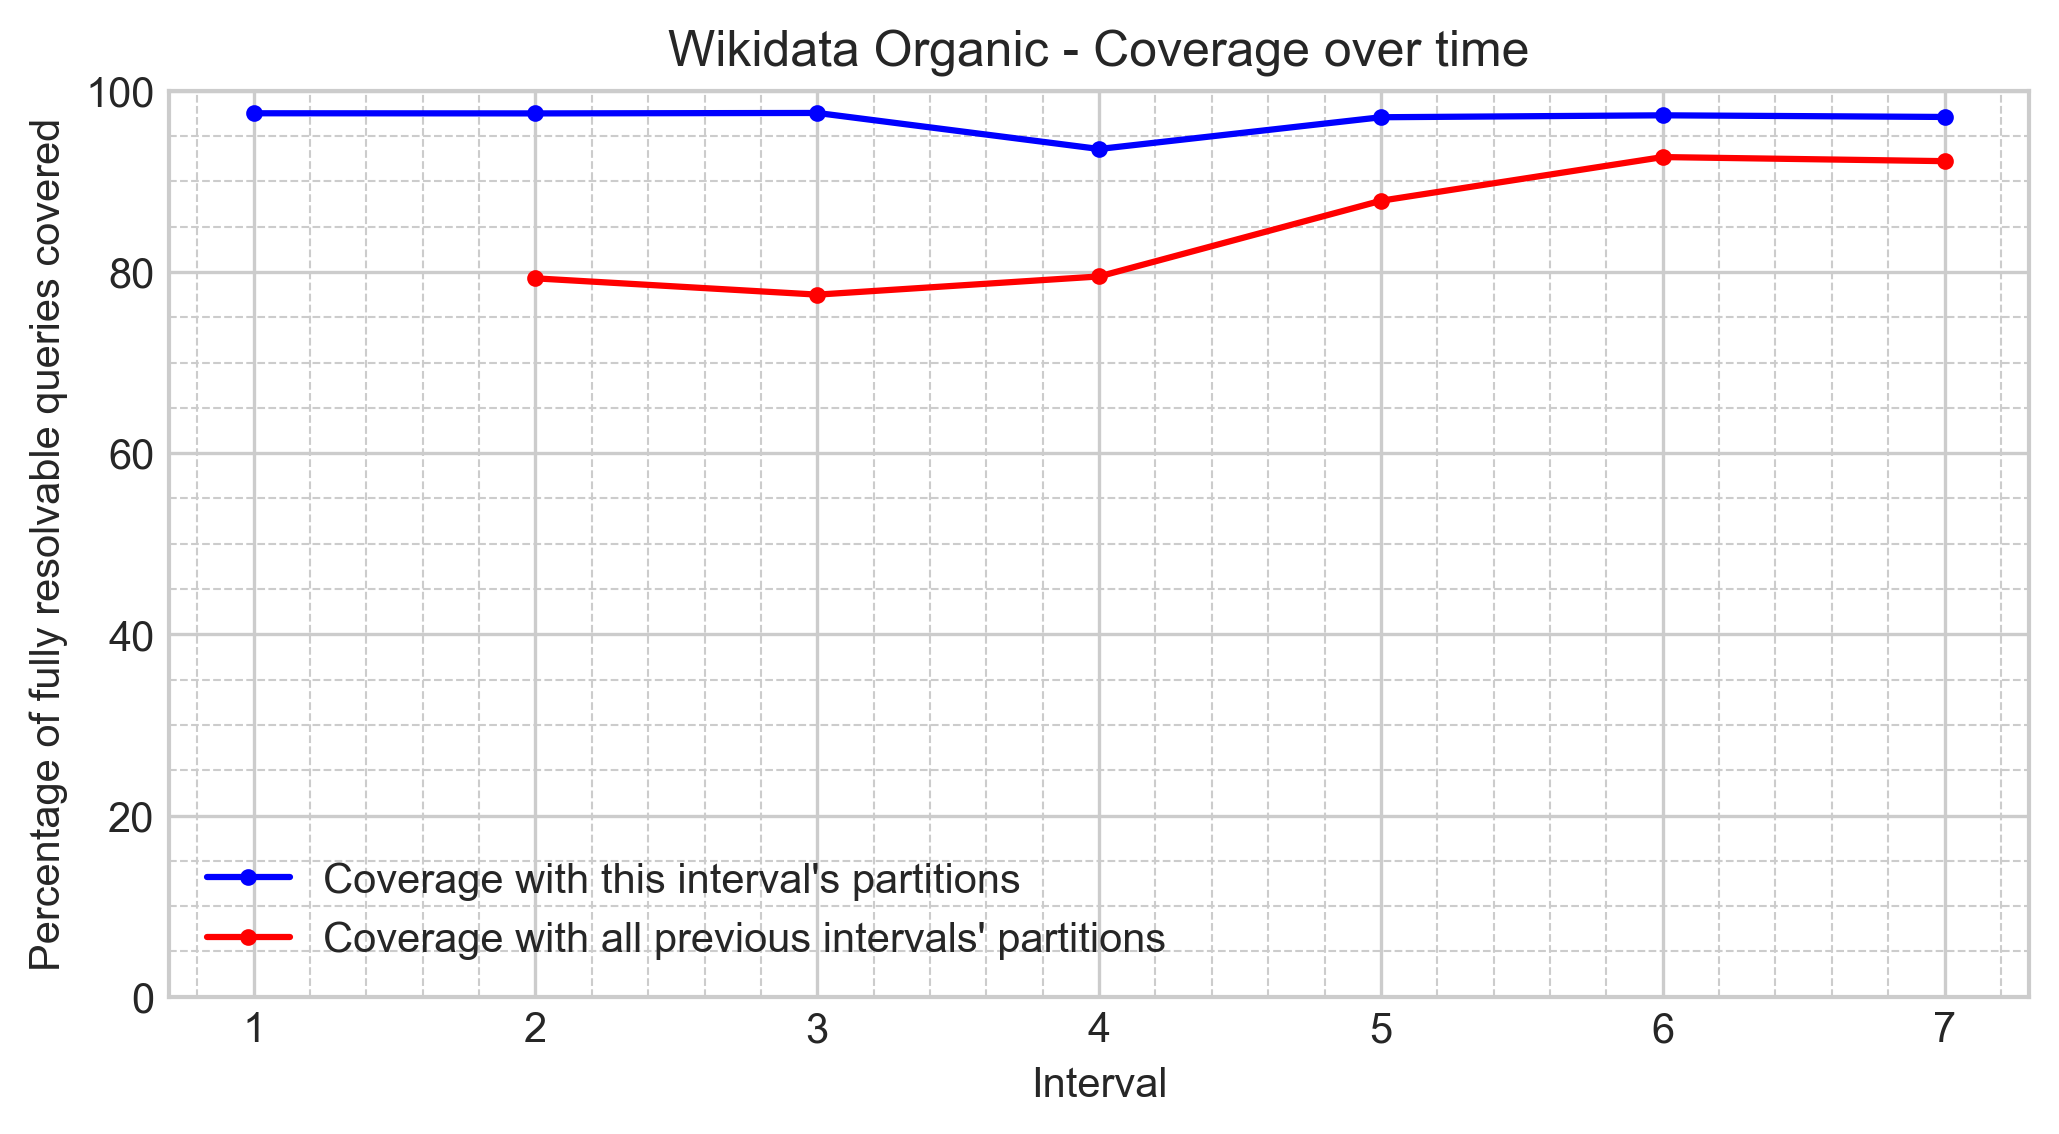

In [33]:
org_cov_now, org_cov_prev = mu.calc_coverage_progression(organic_dfs, under_threshold)
print(org_cov_now)
print(org_cov_prev)

plt.style.use("seaborn-whitegrid")
fig, axes = plt.subplots(figsize=(8,4), dpi=300)
mu.plot_coverage_progression(org_cov_now, org_cov_prev, axes, "Wikidata Organic - Coverage over time")